In [1]:
import numpy as np
from numba import jit
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.integrate import simps

/home/adith/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [11]:
N = 2001
arr = np.ones([N,N])


In [12]:
origin = (N//2,N//2)

In [13]:
@jit(nopython=False)
def line_points(indices,origin):
    # NOTE: Always give index in the positive y quadrant
    i,j = indices
    i = i-origin[0]
    j = j-origin[1]
    points1 = [i]
    points2 = [j]
    for k in range(2,N//2+1):
        i1,j1 = i*k,j*k
        # print(k)
        if not (np.abs(i1)<=origin[0] and np.abs(j1)<=origin[1]):
            break
        points1.append(i1)
        points2.append(j1)
    points1 = np.array(points1)
    points2 = np.array(points2)
    points1 = np.array(list(np.sort(-1*points1+origin[0]))+[origin[0]]+list(points1+origin[0]))
    points2 = np.array(list(np.sort(-1*points2+origin[1]))+[origin[1]]+list(points2+origin[1]))
    return [points1,points2]


def integration(arr,points1,points2,dx_extra=1e-5):
    point = list(zip(points1,points2))
    # print(arr)
    arr_points = np.array([arr[points1[i],points2[i]] for i in range(len(point))])
    # print(arr_points)
    arr_points = (arr_points[:-1]+arr_points[1:])/2
    p0,p1 = point[0],point[1]
    dx = np.sqrt((p1[0]-p0[0])**2 + (p1[1]-p0[1])**2)*dx_extra
    # print(dx)
    # print(arr_points)
    return np.sum(arr_points)*dx
    # exit()

In [14]:
def radon(arr):
    # Implementation
    N = len(arr)
    origin = (N//2,N//2)
    phi = []
    out = []
    for row in tqdm(range(N//2,N)):
        for col in range(N):
            indices = (row,col)
            # print(indices)
            if col-origin[1] != 0:
                phi_val = np.arctan((row-origin[0])/(col-origin[1]))
            else:
                phi_val = np.pi/2
            if phi_val not in phi:
                phi.append(phi_val)
                p1,p2 = line_points(indices,origin)
                # print(p1,p2)
                out.append(integration(arr,p1,p2))
    phi,out = zip(*sorted(zip(phi,out)))
    return np.array(phi),np.array(out)

In [ ]:
phi,out = radon(arr)

  4%|▍         | 38/1001 [00:26<21:19,  1.33s/it]

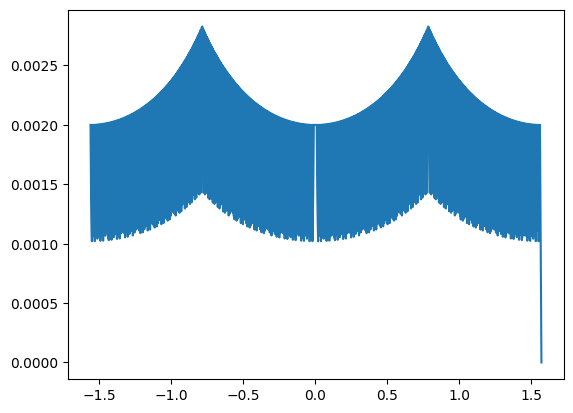

In [35]:
plt.plot(phi,out)
# plt.xlim(-1,-0.99)